# **The Spark Foundation**
# **GRADUATE ROTATIONAL INTERNSHIP PROGRAM BATCH - GRIPMAY2023**
# **Name - ANMOL SACHDEVA**
# **Task 1- Supervised ML-Regression**
# **(Predict the percentage of an student based on the number Of study hours )**




# ***Let's Begin !***
# **IMPORT THE NECESSARY LIBRARIES**

In [1]:
import numpy as np              
import pandas as pd 
# visualize with plots            
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# loading csv File
file_path = '/content/drive/MyDrive/The Spark Foundation/student score.csv'
data_df=pd.read_csv(file_path)

Mounted at /content/drive


# **Lets Explore "Student Score" Dataframe**

In [3]:
# fetching Top 5 rows from dataset using head() function
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Look for bottom rows
data_df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Display the "student_score"  data
student_score=pd.concat([data_df.head(),data_df.tail()])
student_score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#number of rows and columns
data_df.shape

(25, 2)

### **Gettting Statistical Information about our dataset**

In [7]:
# brief summary of the dataset
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **DATA CLEANING**

**In data cleaning we will check for**:

* **Null values/NaN values**
* **Duplicates**

In [8]:
# Check if there are any duplicate rows.
len(data_df[data_df.duplicated()])

0

In [9]:
#Check the columns present in dataset
data_df.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
# Check if there are any null values.
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Conclusion:

1.There are no duplicates present

2.There are no null values present

3.Columns in dataset are 'Hours','Scores'

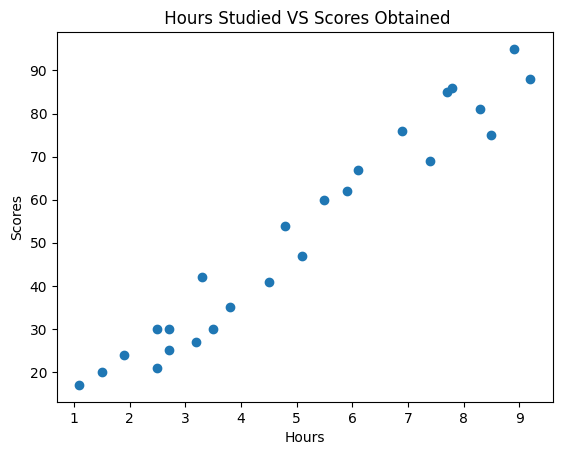

In [11]:
# data visualization
plt.scatter(data_df["Hours"],data_df["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title(" Hours Studied VS Scores Obtained")
plt.show()

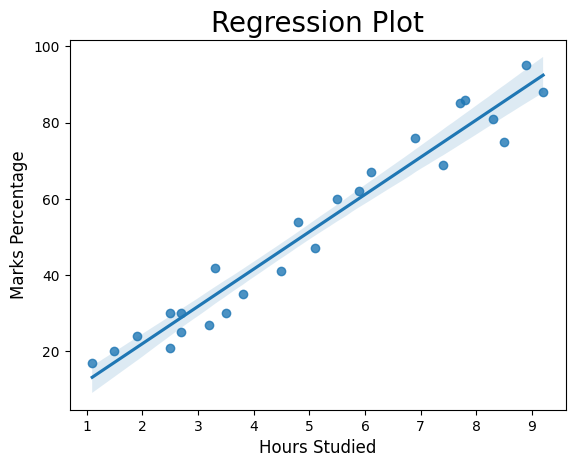

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
sns.regplot(x= data_df['Hours'], y= data_df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data_df.corr()) 


# **Correlation between variables**

<Axes: >

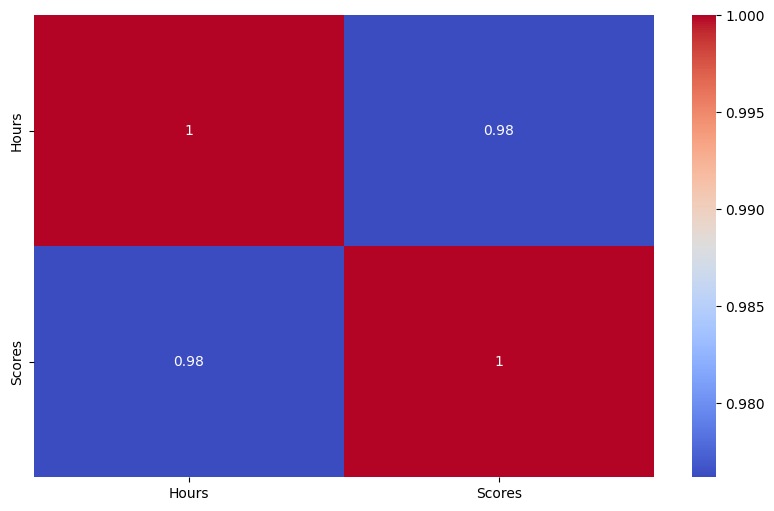

In [13]:
# Check the correlation with the Heatmap.

plt.figure(figsize=(10,6))
correlation = data_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

**Correlation in statistics is the measure of the degree to which two variables move in relationship to each other. An example of correlation is the idea that “As the temperature goes up, ice cream sales also go up.” It is important to remember that correlation doesn’t mean that one event causes another. But, it does indicate that they have a pattern with or a relationship to each other. If one variable goes up and the other variable also goes up, it is a positive correlation. If one variable goes up and the other variable goes down, it is a negative or inverse correlation. If one variable goes up and the other variable stays about the same, there is no correlation.**

# **Data transformation**

**Splitting data**

*  X = Independent variable
*  Y = Dependent variable

#**Train & Test DataSets**
* The dataset must be split into two groups.
* The training dataset is the first subset, which is used to fit the model.
* The model is not trained using the second subset. Instead, the model is given the dataset's input element before making predictions and comparing them to the predicted values. This second dataset is referred to as the test dataset.
* Test Dataset: Used to evaluate how well a machine learning model fits the data.

In [14]:
# Split the datasets
X=data_df.iloc[:,:-1].values
Y=data_df.iloc[:, -1].values


In [15]:
#using train_test_split from sklearn.model_selection to split the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20,random_state= 1)

In [16]:
# Shape of the Training dataset
print(X_train.shape)

(20, 1)


# 1} **Implementing Linear Regression**

In [17]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
#fitting the data to the model
Lin_reg= LinearRegression()
Lin_reg.fit(X_train, Y_train)

LinearRegression()

In [18]:
Prediction_Y=Lin_reg.predict(X_test)
print(Prediction_Y)
Prediction_X=Lin_reg.predict(X_train)
print(Prediction_X)

[ 9.97026179 32.98470004 18.33914843 87.38246316 48.67636248]
[79.01357653 62.27580326 75.87524404 35.0769217  31.93858921 26.70803506
 94.70523897 55.99913828 38.21525418 51.81469497 24.6158134  24.6158134
 91.56690648 80.05968736 70.64468989 26.70803506 85.29024151 45.53802999
 60.1835816  14.15470511]


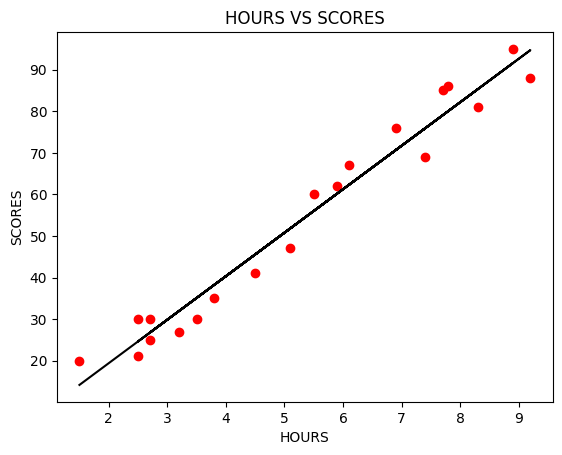

In [19]:
#visualizing training data set
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,Prediction_X,color="black")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.title("HOURS VS SCORES")
plt.show()

In [20]:
#printing predicted scores
prediction=pd.DataFrame({"hours":[i[0] for i in X_test],"predicted marks":[k for k in Prediction_Y]})
print(prediction)

   hours  predicted marks
0    1.1         9.970262
1    3.3        32.984700
2    1.9        18.339148
3    8.5        87.382463
4    4.8        48.676362


In [21]:
#Comparing the actual values with the predicted ones.
dataset_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Prediction_Y})  
print(dataset_compare)

   Actual  Predicted
0      17   9.970262
1      42  32.984700
2      24  18.339148
3      75  87.382463
4      54  48.676362


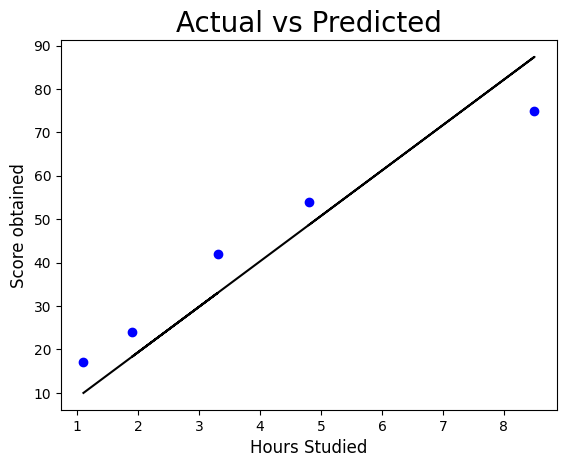

In [22]:
#visualizing actual and predicted values
plt.scatter(x=X_test, y=Y_test, color='blue')
plt.plot(X_test, Prediction_Y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Score obtained', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **Error Metrics**

In [23]:
#Import libraries for Regressor
import math
from sklearn import metrics
from sklearn.metrics import (r2_score)
from sklearn.metrics import (mean_squared_error)
from sklearn.metrics import (mean_absolute_percentage_error)
from sklearn.metrics import (mean_absolute_error)

In [24]:
#Testing Performence of Linear Regression Model
print('Performance of Linear Regression Model')
print("MSE :",round(mean_squared_error(Y_test,Prediction_Y),4))
print("RMSE:",round(math.sqrt(mean_squared_error(Y_test,Prediction_Y)),4))
print("MAE :",round(mean_absolute_error(Y_test,Prediction_Y),4))
print("MAPE:",round(mean_absolute_percentage_error(Y_test,Prediction_Y),4))
print("R2  :",round(r2_score(Y_test,Prediction_Y),4))

Performance of Linear Regression Model
MSE : 68.8809
RMSE: 8.2995
MAE : 7.8824
MAPE: 0.2255
R2  : 0.8421


**since error is minimal so model will give accurate value to a good extent**

In [25]:
hours = [9.25]
answer = Lin_reg.predict([hours])
print("Score = {}".format(answer))

Score = [95.22829438]


# **Conclusion: We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted approximately Score came out to be 95.22%.**